In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair,mybar_pair,myboxplot_pair
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255 

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
# roi: early visual cortex (V1-V3) - face-selective region
num_vf=[[0,3],[4,7]]
vf = ['V1-V3','OFA,FFA-1,FFA-2']
nsample2 = nsubj * np.max(np.diff(num_nf)) * np.max(np.diff(num_vf))
nvertex = 100

data_path = "../data/"

### Response varaince

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52480\2313676717.py:17: SyntaxWarning: invalid escape sequence '\m'
  axes.set_ylabel('Response Variance'+'\n(% '+ 'BOLD change'+'$\mathrm{^2}$'+')',labelpad=0)


p(correction):[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


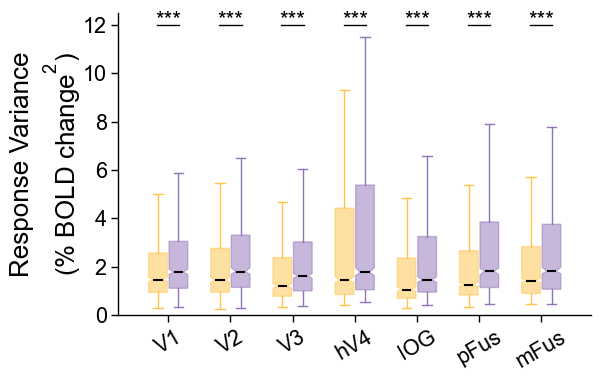

In [ ]:
rvv_all = np.load(data_path+'responsevariance.npz',allow_pickle=True)['rvv_all']
rvv = np.nanmedian(rvv_all,axis=1)
rvv = rvv.reshape(rvv.shape[0]*rvv.shape[1],rvv.shape[2],rvv.shape[3])
rvv[:,:,[0,1]] = rvv[:,:,[1,0]] # 800sample x 7roi x 2task

# two-tailed sign test
ps,sts = pair_test(rvv,method='sign',correction='bonferroni')
print('p(correction):{}'.format([round(p,4) for p in ps]))

# plot
ylims = [0,12.5,2]
pys = [12.2,12]
set_figure()
fig,axes = plt.subplots(1,1,figsize=(6.2,4))
set_ax(axes)
myboxplot_pair(axes,rvv,"median","ci",ps,pys,defaultci=True)
axes.set_ylabel('Response Variance'+'\n(% '+ 'BOLD change'+'$\mathrm{^2}$'+')',labelpad=0)
axes.set_xticklabels(roi_labels)
axes.set_yticks(np.arange(ylims[0],ylims[1]*1.01,ylims[2]))
axes.set_xlim([0.2,7.8])
axes.set_ylim(ylims[:2])
axes.tick_params(axis='x', rotation=30, width=1, direction='out') # , bottom=False
fig.savefig('fig4-rv.pdf', bbox_inches='tight')

### Fano Fator


p(correction):[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_84384\1045490150.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig3-FF2.pdf', bbox_inches='tight')
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


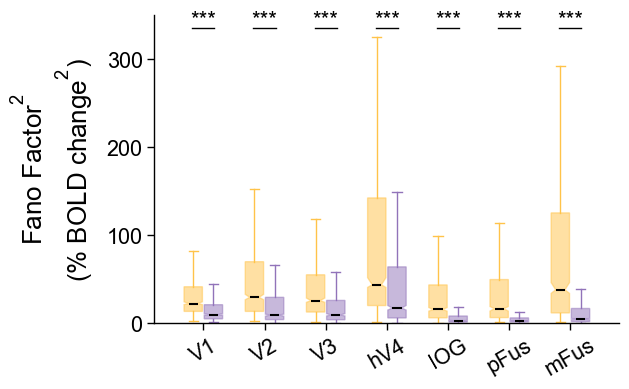

In [ ]:
FF2v_all = np.load(data_path+'FF.npz',allow_pickle=True)['FFv_all']
FF2v = np.nanmedian(FF2v_all,axis=1)
FF2v = FF2v.reshape(FF2v.shape[0]*FF2v.shape[1],FF2v.shape[2],FF2v.shape[3])
FF2v[:,:,[0,1]] = FF2v[:,:,[1,0]] # 800sample x 7roi x 2task

# two-tailed sign test
ps,sts = pair_test(FF2v,method='sign',correction='bonferroni')
print('p(correction):{}'.format([round(p,4) for p in ps]))

# plot
#ylims = [0,25,5]
#pys = [24,23.7]
ylims = [0,350,100]
pys = [345,335]
set_figure()
fig,axes = plt.subplots(1,1,figsize=(6,4),gridspec_kw={'wspace': 0.2})
set_ax(axes)
myboxplot_pair(axes,FF2v,"median","ci",ps,pys,defaultci=True)
axes.set_ylabel(r'Fano Factor$^2$'+ '\n'+ r'(% BOLD change$^2$)',labelpad=8)
axes.set_xticklabels(roi_labels)
axes.set_yticks(np.arange(ylims[0],ylims[1]*1.01,ylims[2]))
axes.set_xlim([0.2,7.8])
axes.set_ylim(ylims[:2])
axes.tick_params(axis='x', rotation=30, width=1, direction='out') # , bottom=False
fig.savefig('fig4-FF2.pdf', bbox_inches='tight')

### Noise Correlation


p(without correction):[0.0002, 0.0003, 0.0003, 0.0202, 0.0001, 0.5561, 0.0363]
p(correction):[0.0011, 0.0019, 0.0019, 0.1415, 0.0004, 1.0, 0.2538]


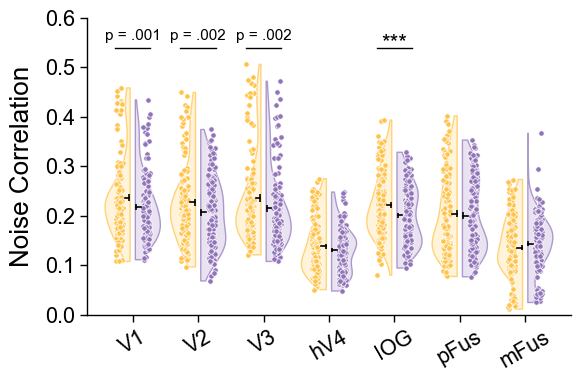

In [ ]:
corr_all = np.load(data_path+'corr.npz',allow_pickle=True)['corr_all']  # 128sample x 7roi x 2task
corr_all[:,:,[0,1]] = corr_all[:,:,[1,0]] # 128sample x 7roi x 2task

# wilcoxon test
corr_all_fisherz = fisherztrans(corr_all)
ps0,sts = pair_test(corr_all_fisherz,method='wilcoxon',correction='none')
ps,sts = pair_test(corr_all_fisherz,method='wilcoxon',correction='bonferroni')
print('p(without correction):{}'.format([round(p,4) for p in ps0]))
print('p(correction):{}'.format([round(p,4) for p in ps]))

# plot
ylims = [0,0.6,0.1]
pys = [0.55,0.54]
set_figure()
fig,axes = plt.subplots(1,1,figsize=(6,4))
set_ax(axes)
myviolinplot_pair(axes,corr_all,"mean","sem",ps,pys)
axes.set_ylabel('Noise Correlation',labelpad=8)
axes.set_xticklabels(roi_labels)
axes.set_yticks(np.arange(ylims[0],ylims[1]*1.01,ylims[2]))
axes.set_xlim([0.3,7.7])
axes.set_ylim(ylims[:2])
axes.tick_params(axis='x', rotation=30, width=1, direction='out') # , bottom=False
fig.savefig('fig4-noisecorr.pdf', bbox_inches='tight')